# **scDECA: Intergrating Gene-Cell interactions with Global Priors and Local Structures in Single-Cell Transcriptomic**

In [1]:
import scDECA

/data/project/bin000815/PriorGraph/scDECA/scDECA/main.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/home/bin000815/.conda/envs/scDECA/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import scanpy as sc

adata = sc.read_h5ad('/data/project/bin000815/PriorGraph/scDECA/scDECA/Data/adata.h5ad')

In [3]:
# --- scKNN 파라미터 설정 ---
scDECA.main.MAX_CELLS_BATCH_SIZE = 50000
scDECA.main.EXPRESSION_CUTOFF = 0.1
scDECA.main.NUM_LAYERS = 3
scDECA.main.DE_GENES_NUM = 3500
scDECA.main.EMBEDDING_DIM = 256

Device set to: cuda:0
Using SCGPT embeddings from AnnData.varm
Using embedding key: 'scGPT_gene_token'
Embedding shape: (23686, 512)


2025-11-17 16:30:51.744559: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 16:30:51.770628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-17 16:30:51.770648: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-17 16:30:51.771901: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-17 16:30:51.776457: I tensorflow/core/platform/cpu_feature_guar

Loading PPI network...
Constructing network with SCGPT embeddings from AnnData...
Gene filtering process:
   - PPI network genes: 14136
   - Genes in single-cell data: 12204
Applying expression cutoff...
   - Genes after expression cutoff: 12204
Number of genes passed to embedding: 12204
Preparing SCGPT gene embeddings for 12204 target genes...
Loading scGPT_gene_token gene embeddings from AnnData...
Found embeddings in adata.varm['scGPT_gene_token']
   - Shape: (19329, 512)
   - Total genes: 19329
   - Genes with valid embeddings (no NaN): 16946
   - Genes with NaN embeddings: 2383
Found 12178 target genes with valid embeddings
   First 10 missing/NaN genes: ['SIGLEC5', 'PHOSPHO2-KLHL23', 'TBCE', 'MATR3', 'GAGE4', 'CCL4L1', 'SNAR-B2', 'RGS5', 'GSTT1', 'FAM153B']...
Created gene embeddings from AnnData: (12178, 512)
   - Final genes after NaN filtering: 12178
   - Gene index sample: ['RPS11', 'ELMO2', 'CREB3L1', 'PNMA1', 'MMP2']
selected_genes: ['RPS11', 'ELMO2', 'CREB3L1', 'PNMA1', 'M

Training: 100%|██████████| 250/250 [22:04<00:00,  5.30s/it, Loss=3.1036, Row=0.9036, Col=1.0516, AUC=0.8888, AP=0.9124] 



PERFORMING FINAL ATTENTION ANALYSIS
Final attention analysis dimensions:
   - Genes: 12032
   - Cells: 713
   - x_raw shape: torch.Size([12032, 713])
Attention matrix dimensions: cells=713, genes=12032


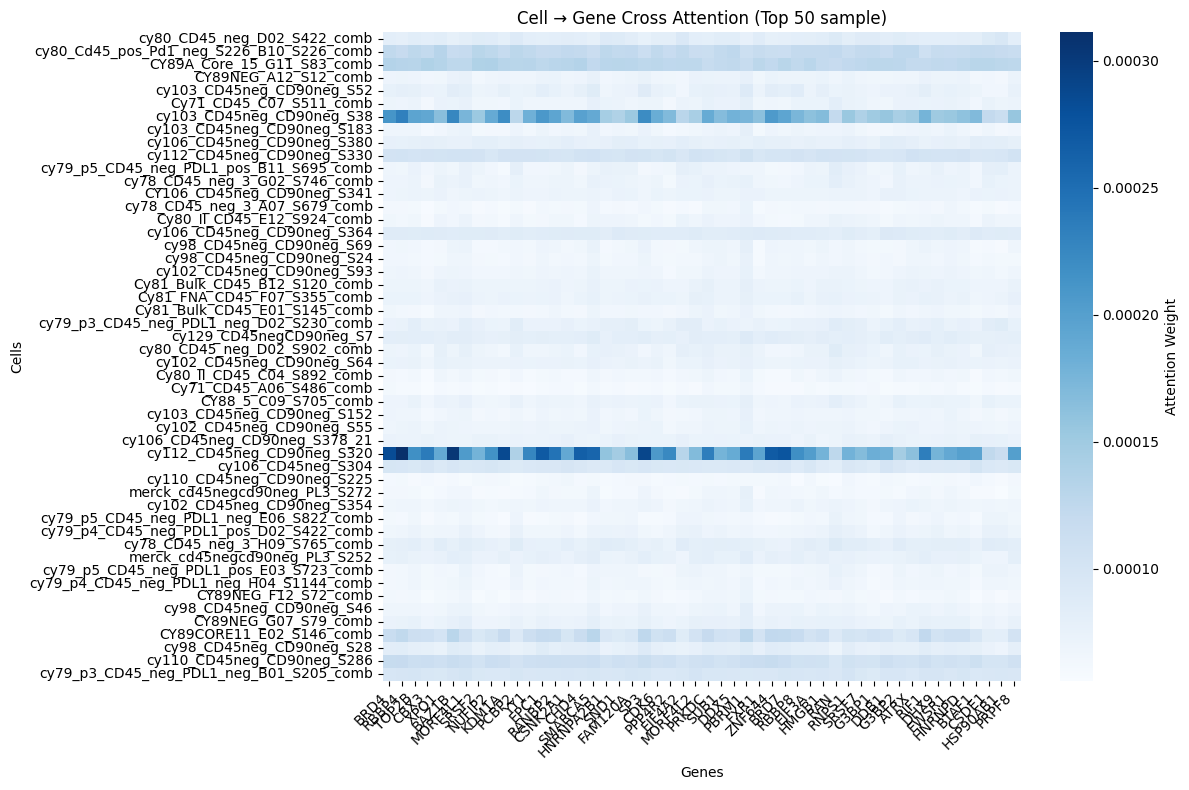

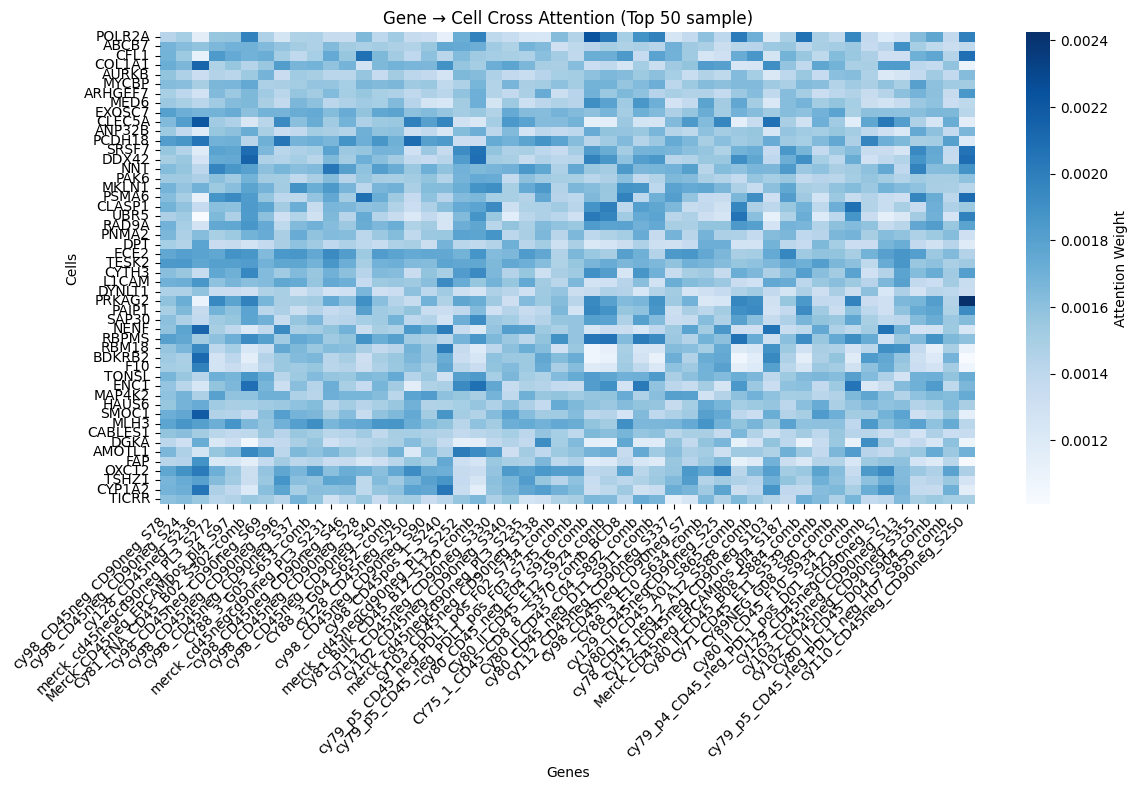

Saved Cell→Gene attention: /data/project/bin000815/PriorGraph/scDECA/scDECA/Models/scDECA_V1/Attention/final_analysis/cell_to_gene_attention.csv
Saved Gene→Cell attention: /data/project/bin000815/PriorGraph/scDECA/scDECA/Models/scDECA_V1/Attention/final_analysis/gene_to_cell_attention.csv
Final attention analysis completed and saved to: /data/project/bin000815/PriorGraph/scDECA/scDECA/Models/scDECA_V1/Attention/final_analysis


scDECA(
  (gene_encoder): GeneEncoder(
    (expression_layers): ModuleList(
      (0): Sequential(
        (0) - SAGEConv(713, 512, aggr=mean): x, edge_index -> x1
        (1) - ELU(alpha=1.0, inplace=True): x1 -> x1
        (2) - Dropout(p=0.25, inplace=False): x1 -> x2
      )
      (1-2): 2 x Sequential(
        (0) - SAGEConv(512, 512, aggr=mean): x, edge_index -> x1
        (1) - ELU(alpha=1.0, inplace=True): x1 -> x1
        (2) - Dropout(p=0.25, inplace=False): x1 -> x2
      )
    )
    (foundation_proj): Sequential(
      (0): Linear(in_features=512, out_features=512, bias=True)
      (1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (2): GELU(approximate='none')
      (3): Dropout(p=0.25, inplace=False)
    )
    (fusion_layer): Sequential(
      (0): Linear(in_features=512, out_features=256, bias=True)
      (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (2): SiLU()
      (3): Dropout(p=0.25, inplace=False)
    )
    (final_layers): ModuleLis

In [4]:
scDECA.run_scDECA(
    adata,
    model_type='scgpt',  
    embedding_key='scGPT_gene_token', 
    pre_processing_flag=True, 
    human_flag=True,  
    number_of_batches=5,
    split_cells=False,
    max_epoch=250,
    model_name="scDECA_V1",
    device_str="cuda:0",
    num_heads=8,
    projection_dim=512
)

